In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('/content/train.csv')

# Data preprocessing
# Fill missing values in numerical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values in categorical columns with 'unknown' (or any other strategy you prefer)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('unknown')

# Define features and target variable
X = data.drop(columns=['SalePrice'])  # Update target variable to 'SalePrice'
y = data['SalePrice']

# Encode categorical variables and scale numeric features
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression with Cross-Validation
ridge = Ridge()
params_ridge = {'alpha': np.logspace(-3, 3, 50)}
ridge_cv = GridSearchCV(ridge, params_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print("Best alpha for Ridge:", ridge_cv.best_params_)
ridge_best = ridge_cv.best_estimator_

# Lasso Regression with Cross-Validation
lasso = Lasso(max_iter=10000)
params_lasso = {'alpha': np.logspace(-3, 3, 50)}
lasso_cv = GridSearchCV(lasso, params_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
print("Best alpha for Lasso:", lasso_cv.best_params_)
lasso_best = lasso_cv.best_estimator_

# Evaluate models on the test set
ridge_preds = ridge_best.predict(X_test)
lasso_preds = lasso_best.predict(X_test)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_preds)))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso_preds)))

# Significant features for Lasso
significant_features_lasso = pd.Series(lasso_best.coef_, index=X.columns)
significant_features_lasso = significant_features_lasso[significant_features_lasso != 0]
print("Significant variables in Lasso:", significant_features_lasso)


Best alpha for Ridge: {'alpha': 568.9866029018293}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.979e+10, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+11, tolerance: 5.256e

Best alpha for Lasso: {'alpha': 25.595479226995334}
Ridge RMSE: 33581.46858577656
Lasso RMSE: 36273.00469966818
Significant variables in Lasso: Id                        130.582580
MSSubClass              -1270.575769
LotFrontage               349.601618
LotArea                  6408.465566
OverallQual              9797.912640
                            ...     
SaleCondition_AdjLand     699.910279
SaleCondition_Alloca     2432.355595
SaleCondition_Family      102.989211
SaleCondition_Normal     2414.160404
SaleCondition_Partial    4472.499392
Length: 233, dtype: float64


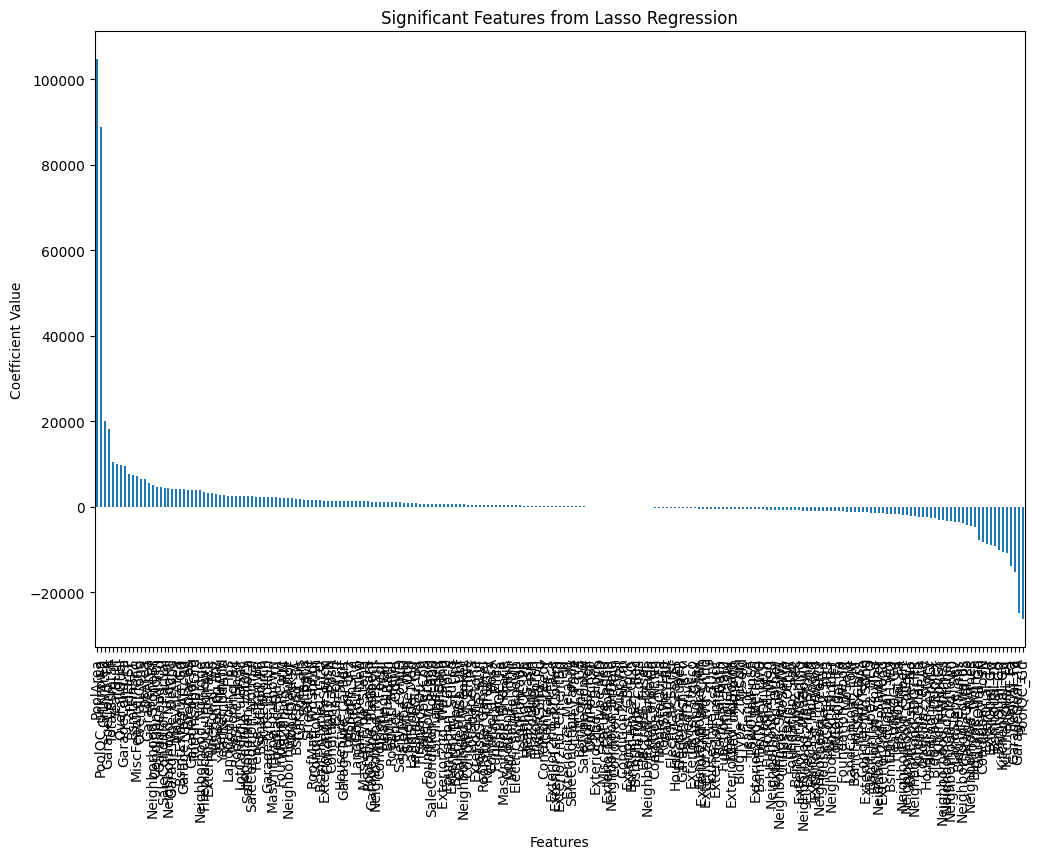

In [6]:
# Plot significant features
plt.figure(figsize=(12, 8))
significant_features_lasso.sort_values(ascending=False).plot(kind='bar')
plt.title('Significant Features from Lasso Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()


In [7]:
from sklearn.metrics import r2_score

r2_ridge = r2_score(y_test, ridge_preds)
r2_lasso = r2_score(y_test, lasso_preds)

print("Ridge R²:", r2_ridge)
print("Lasso R²:", r2_lasso)


Ridge R²: 0.8529769136388456
Lasso R²: 0.8284648091355874


In [8]:
print("Best alpha for Ridge:", ridge_cv.best_params_)


Best alpha for Ridge: {'alpha': 568.9866029018293}


### **the analysis shows that several variables, particularly OverallQual, LotArea, and LotFrontage, are significant predictors of house prices, with a good degree of explanatory power as indicated by the RMSE and potentially R². The optimal alpha values of approximately 25.60 for Lasso and the corresponding value for Ridge provide a balanced approach to regularization for these predictive models**